### Utilizzeremo PCA Kernel per passare da uno Spazio Dimensionale Non Lineare a uno con dimensione Minore di Tipo Lineare

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score, log_loss

In [4]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.2, random_state=1)

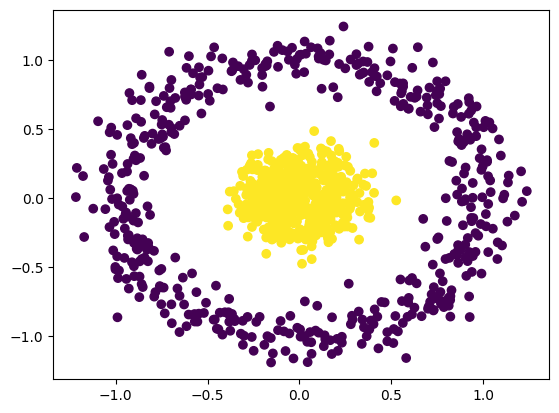

In [5]:
plt.scatter(X[:,0] ,X[:,1], c=y)

### Chiaramente non Lineare, Nesssuna Retta puo separare le due Classi

#### Verifichiamo con un Modello di Regressione Logistica

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
lr = LogisticRegression()

In [8]:
lr.fit(X_train, y_train)

LogisticRegression()

#### Calcoliamo la sua accuracy

In [9]:
accuracy_score(y_train, lr.predict(X_train))

0.53

In [10]:
accuracy_score(y_test, lr.predict(X_test))

0.505

### Modello Inutile!!!

## Visioniamo il Decisionary Boundary

In [11]:
from scripts.viz import plot_boundary

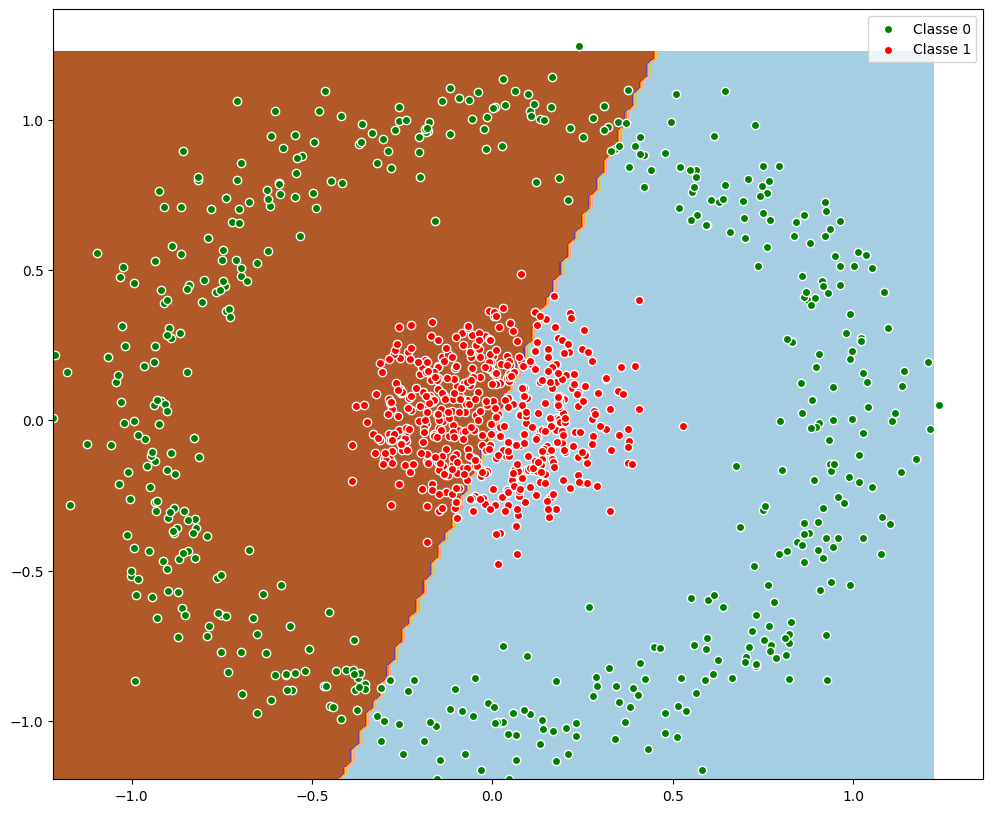

In [12]:
plot_boundary(lr, X, y)

### Applichiamo la PCA con Funzione Kernel

In [13]:
from sklearn.decomposition import KernelPCA

### Quando i dati prendono una forma circolare, Bisogna usare la Funz. Kernel = Gaussiana

In [14]:
kpca = KernelPCA(kernel="rbf", gamma=5)

#### Estraiamo le componenti Principali

In [15]:
kpc = kpca.fit_transform(X)

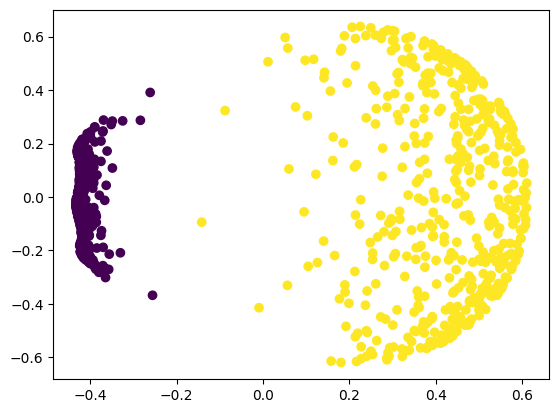

In [16]:
plt.scatter(kpc[:,0], kpc[:,1], c=y)

### Puoi notare che la maggioir parte delle informazioni per eseguire la classficazione è contenuta nella prima componente

#### Proviamo a Visualizzare una sola componente!

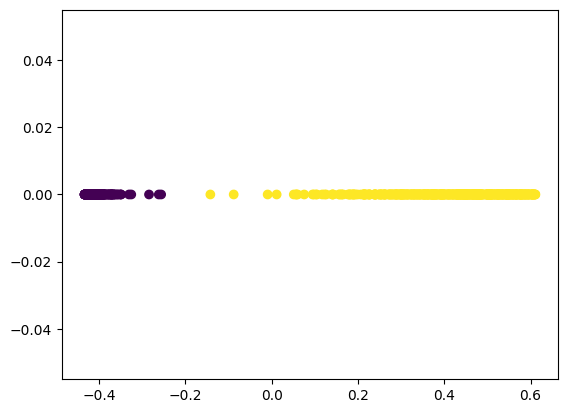

In [19]:
plt.scatter(kpc[:,0], np.zeros(1000), c=y)

#### Creiamo un modello di Regressione Logistica che utiliza come Features solo la prima componente principale

#### Estraiamola

#### Le features devono essere in un array multidimensionale 

In [20]:
fpc = kpc[:,0]

In [21]:
fpc.shape

(1000,)

In [22]:
fpc = fpc.reshape(-1,1)

In [23]:
fpc.shape

(1000, 1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(fpc , y, test_size=0.2, random_state=0)

In [25]:
lr = LogisticRegression()

In [26]:
lr.fit(X_train, y_train)

LogisticRegression()

In [27]:
accuracy_score(y_train, lr.predict(X_train))

0.9975

In [28]:
accuracy_score(y_test, lr.predict(X_test))

1.0

#### Modello Perfetto!